# Rampa in T del PbS 900

I dati sui picchi vengono raccolti in PbS_T_peaks, quindi analizzati in PbS900_VARSHNI.ipynb

Per ciascuna delle 18 temperature, si raccoglie lo spettro con filtro 0e5.

In [9]:
arr_T = ['90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
        '190', '200', '210', '220', '240', '250', '265', '300'] # + 'K'

## Importazioni

In [10]:
from qp2_subroutines import *
import os

In [11]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Per la costruzione dei nomi dei file

In [12]:
def build_name_PbS_in_T (T: str = None):
    # t_acq == 0e25
    # n_acq == 5
    # grating == 35lmm
    # ecc ==1064
    # filtro == 0e5pc
    
    cartella = 'data/rampa_T_PbS_900/'
    name = 'Giak_' + '0e25_5_550_1064_35l_' + T + 'K_0e5pc_PbS.asc'
    
    return cartella+name

Per il fit: opto per la somma di N gaussiane.

Il vettore params viene definito come una list di N triple (a, mu, sigma), una per ciascuna gaussiana. Successivamente deve essere 'appiattito' con .flatten() per renderlo un array unidimensionale, trattabile da curve_fit().

In [13]:
def N_gaussiane (x, *params):
    # Inizializzo il risultato
    y = np.zeros_like(x)
    # Sommo una gaussiana per ciascuna entrata della list
    for i in range(0, len(params), 3):  # Scandisco i parametri a gruppi di 3
        A, mu, sigma = params[i], params[i+1], params[i+2]
        y += gaussiana(x, A, mu, sigma)
        
    return y

Servirà dopo per i colori nei grafici.

In [14]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

Fare caso al fatto che fit_N_gaussiane prende in argomento il numero di acquisizioni! Il motivo è spiegato bene nella docstring. In breve: serve a correggere con un senso l'errore poissoniano!

---

---

# Analisi

## PbS su TEMPERATURA

#### Contenitori per i dati

In [15]:
# dictionary PbS_T
# le keys saranno le temperature
# ciascuna key conterrà le due colonne del file:
# PbS_T[T][0] - colonna 0 del file (lunghezze d'onda)
# PbS_T[T][1] - colonna 1 del file (counts)

PbS_T = {}

In [16]:
# dictionary per i picchi
PbS_T_peaks = {}

#### Lettura file

In [17]:
for T in arr_T:
    
    # Costruisco nome file
    name = build_name_PbS_in_T (T=T)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    PbS_T[T] = (waveln, counts)

#### Errore da associare ai valori in nm

In [18]:
print ( np.max(waveln)-np.min(waveln) ) 
print (len(waveln))

print ( (np.max(waveln)-np.min(waveln)) / len(waveln) ) 

724.2422799999999
512
1.4145357031249999


#### Plot su temperatura

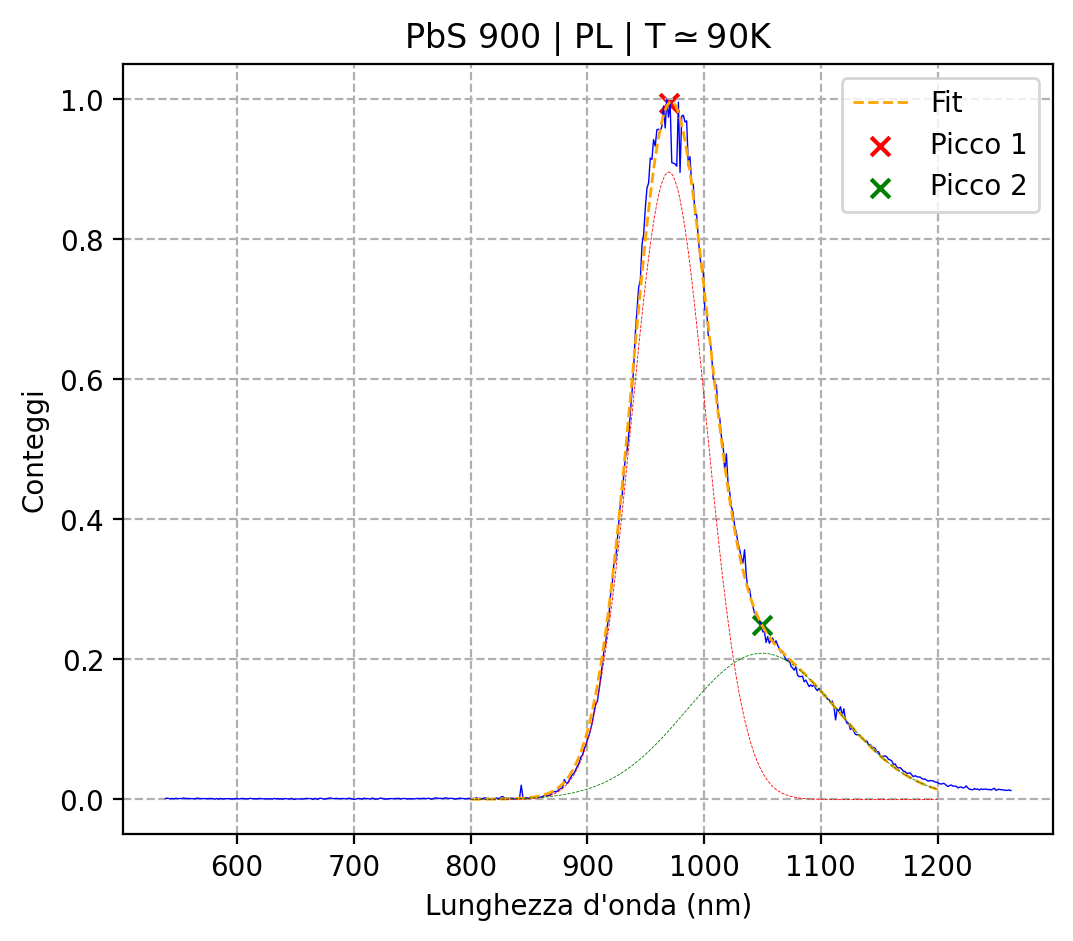

• Gaussiana  1
 - A = 0.8962841637403094
 - mu = 969.7741282412981
 - sigma = 31.973414593135494
• Gaussiana  2
 - A = 0.208885352119124
 - mu = 1049.5859331310648
 - sigma = 65.05518361659702
 - chi2rid = 0.17721153167384676


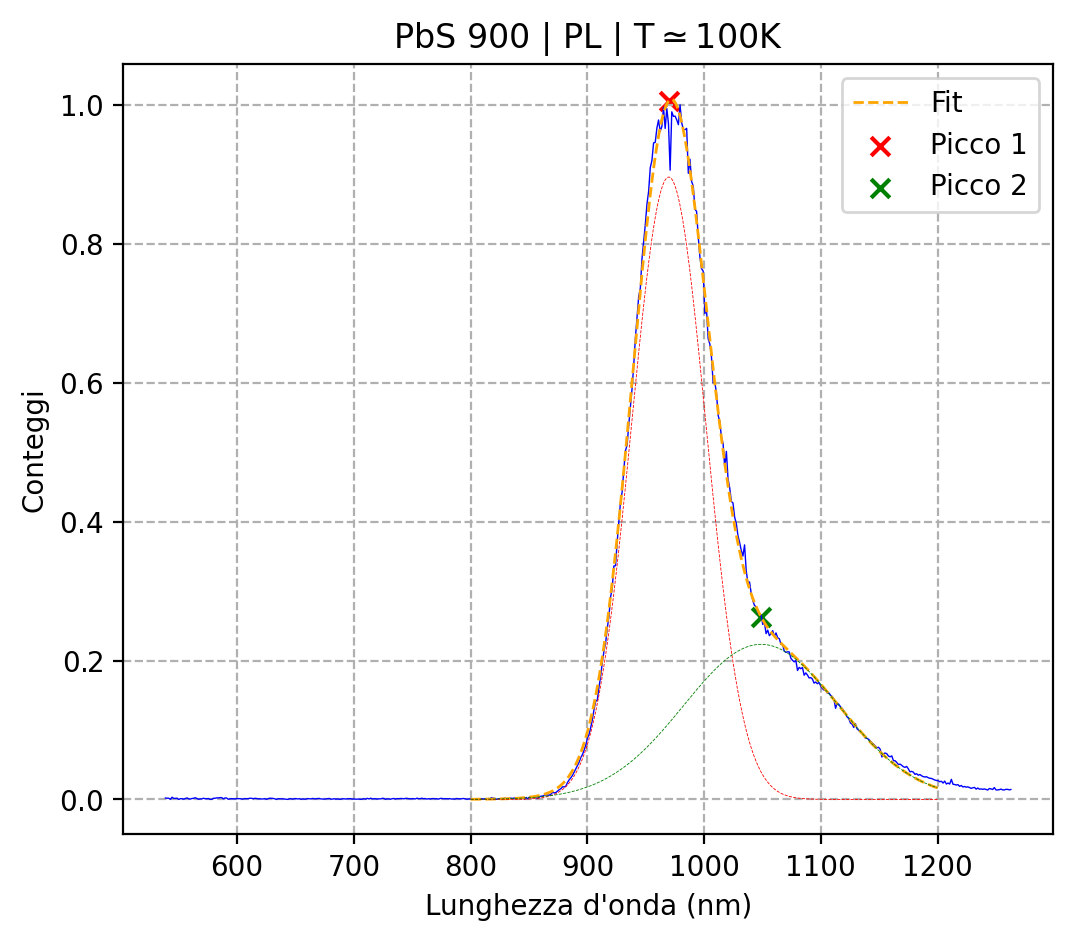

• Gaussiana  1
 - A = 0.8960343121787757
 - mu = 969.7092310539604
 - sigma = 31.648173529533935
• Gaussiana  2
 - A = 0.22331607202447468
 - mu = 1048.7886026593944
 - sigma = 66.27952464200285
 - chi2rid = 0.14731060845146568


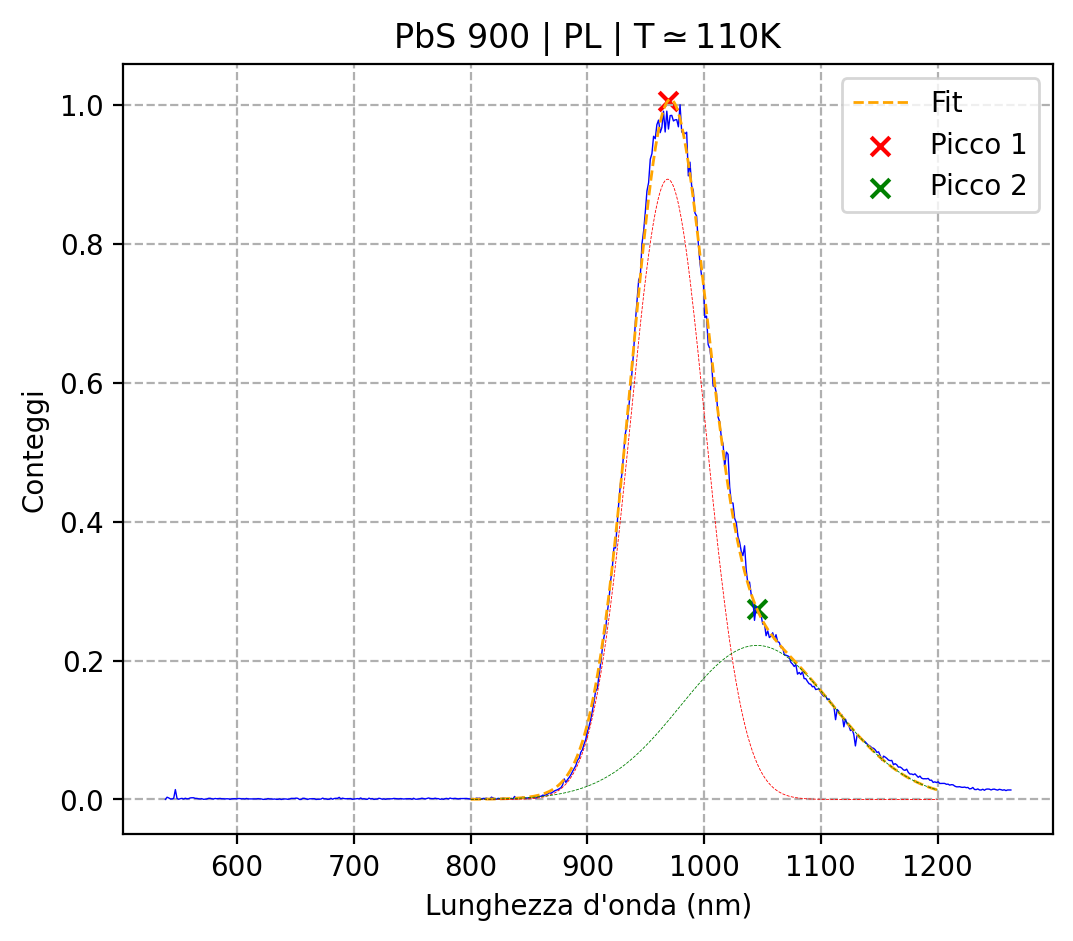

• Gaussiana  1
 - A = 0.892841305006805
 - mu = 968.8181995593548
 - sigma = 32.09382480521883
• Gaussiana  2
 - A = 0.2217664043989024
 - mu = 1045.1483007622667
 - sigma = 65.5089999115695
 - chi2rid = 0.16009924832300387


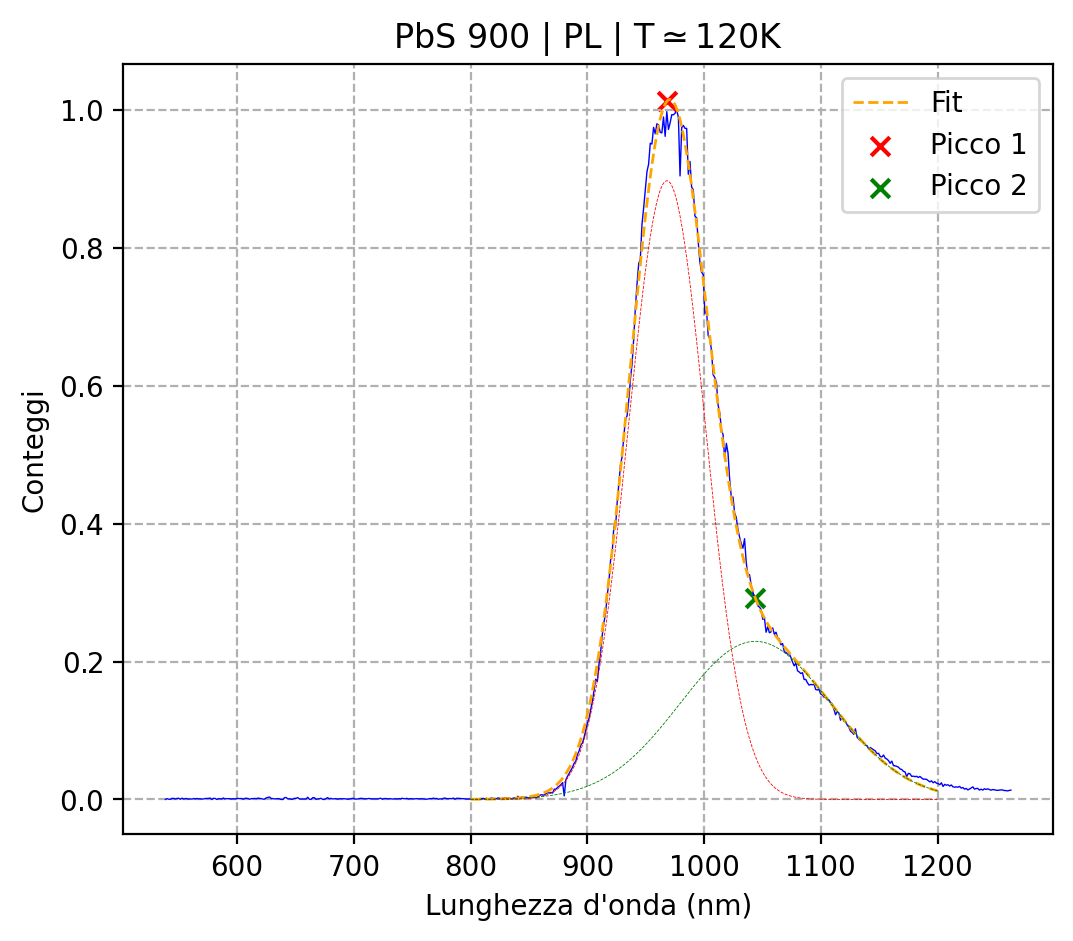

• Gaussiana  1
 - A = 0.8974476387651475
 - mu = 968.1444229651712
 - sigma = 32.820905993682146
• Gaussiana  2
 - A = 0.22933938050960695
 - mu = 1043.9325051428862
 - sigma = 64.6396816007328
 - chi2rid = 0.29173405716727624


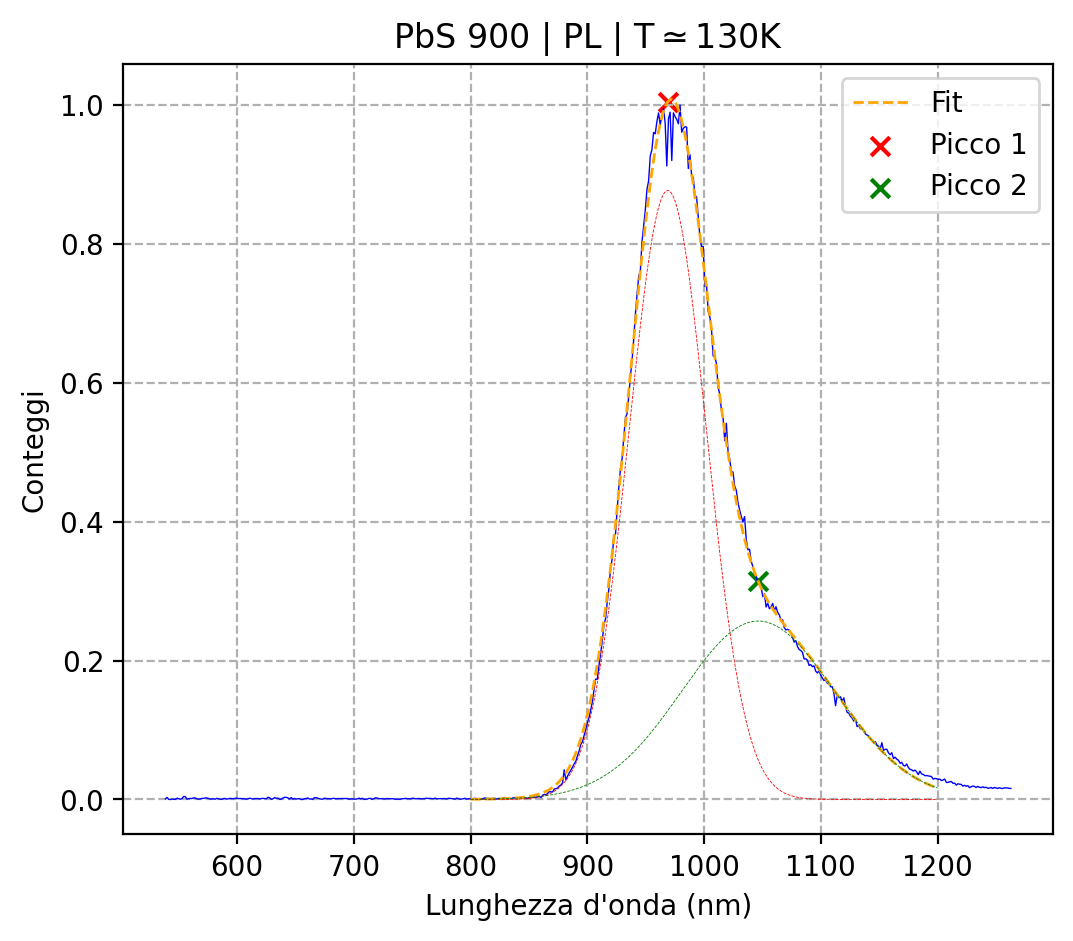

• Gaussiana  1
 - A = 0.8768993589406048
 - mu = 968.8599113182962
 - sigma = 33.13292077926575
• Gaussiana  2
 - A = 0.25692615472243857
 - mu = 1046.2846148968433
 - sigma = 65.53329136485948
 - chi2rid = 0.1837097612605289


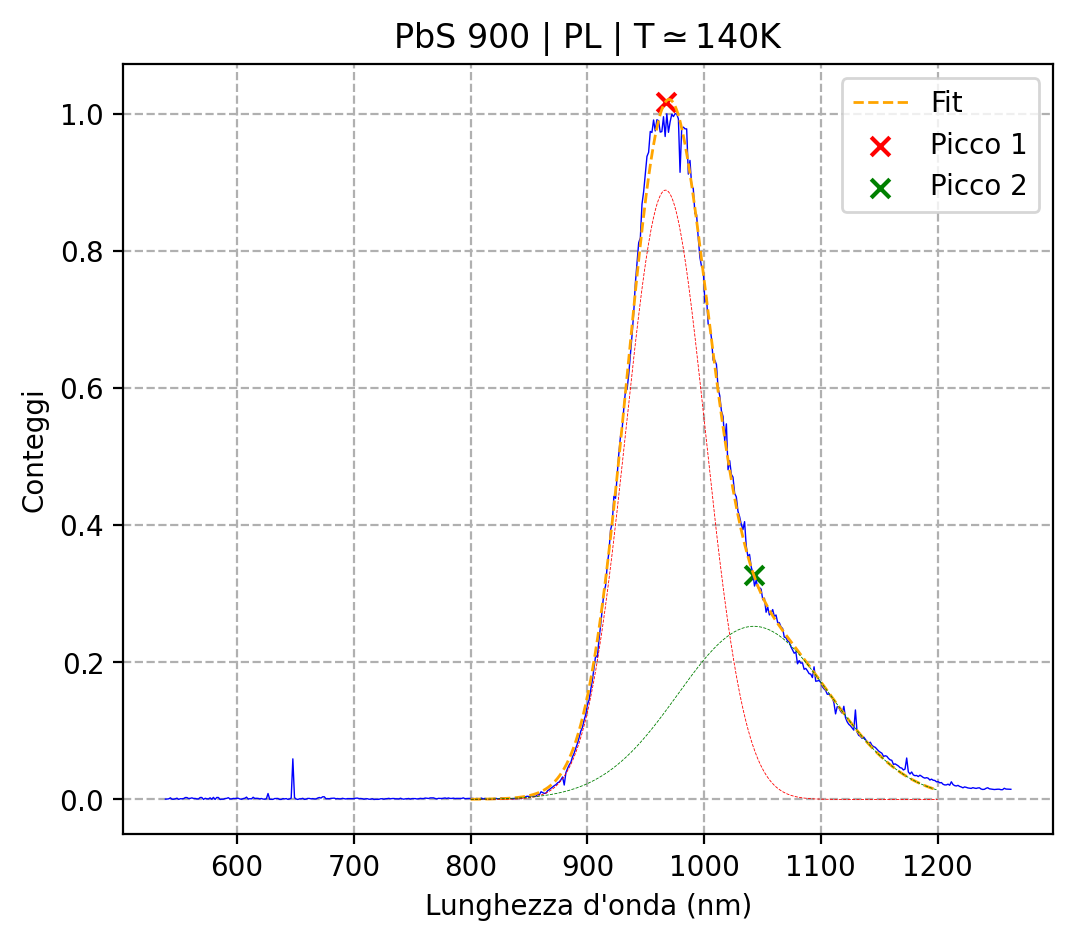

• Gaussiana  1
 - A = 0.8884723830582418
 - mu = 966.9555663504888
 - sigma = 33.96219191592435
• Gaussiana  2
 - A = 0.2524655290988025
 - mu = 1042.5559500905083
 - sigma = 65.17793629370092
 - chi2rid = 0.2072804253546031


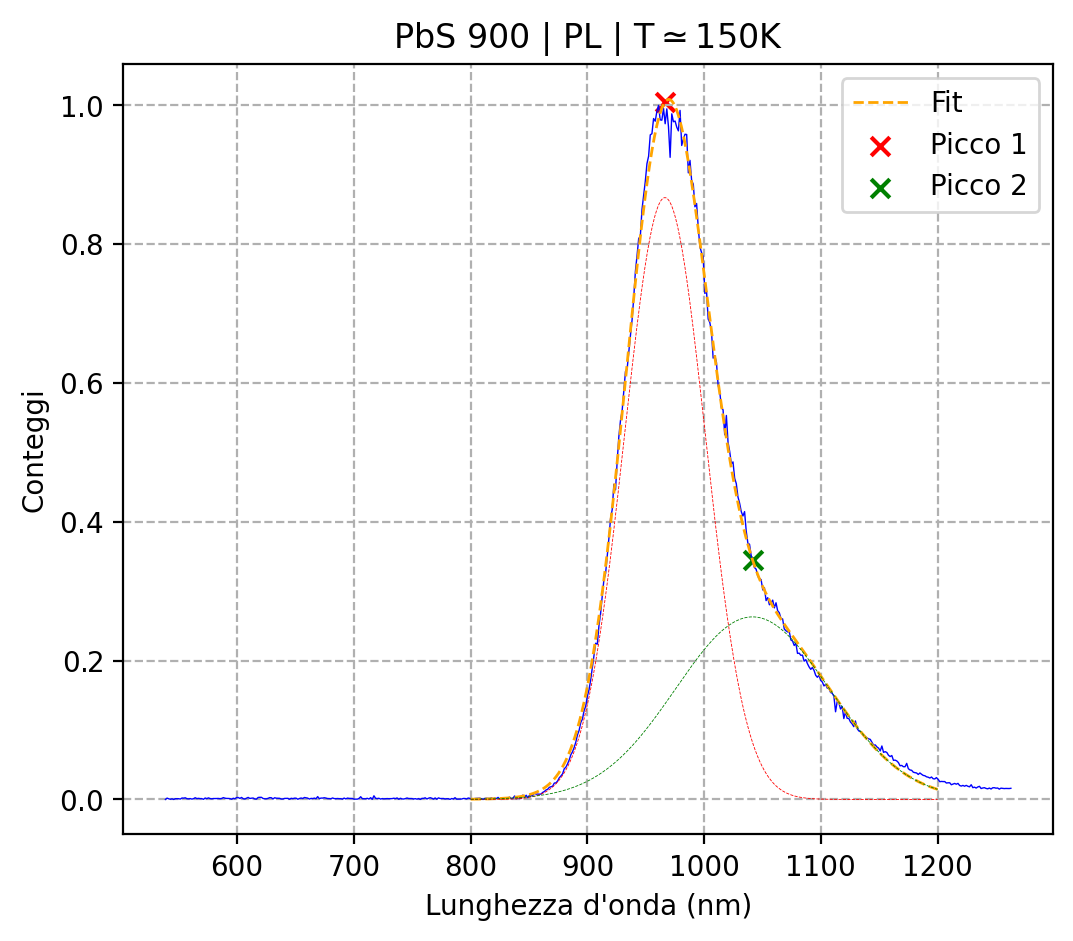

• Gaussiana  1
 - A = 0.867101165522137
 - mu = 966.4402960859712
 - sigma = 34.55711439947403
• Gaussiana  2
 - A = 0.26303974887260384
 - mu = 1041.4376418728218
 - sigma = 65.864540840449
 - chi2rid = 0.20468535711451585


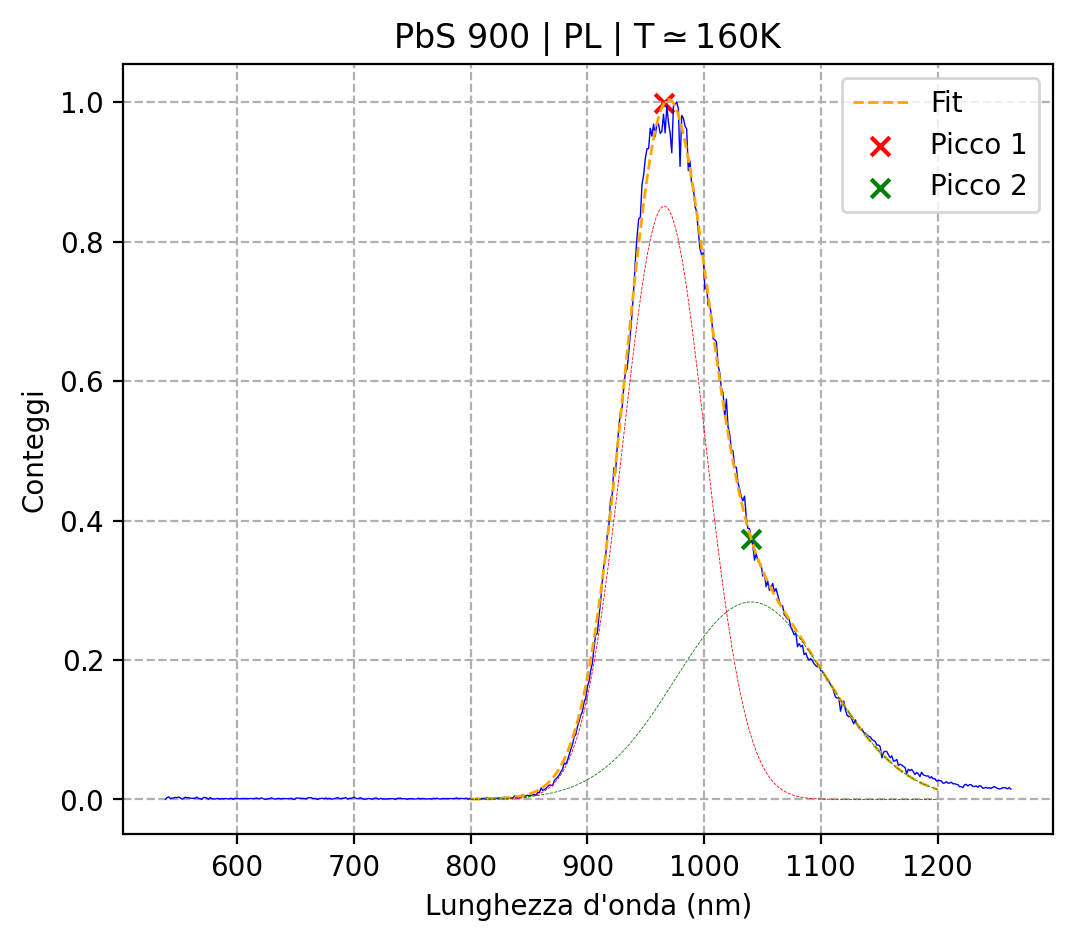

• Gaussiana  1
 - A = 0.8508039112805496
 - mu = 965.8508169316465
 - sigma = 35.14415393038276
• Gaussiana  2
 - A = 0.2831916901942102
 - mu = 1040.2674114474155
 - sigma = 65.35333683843602
 - chi2rid = 0.18690621886146944


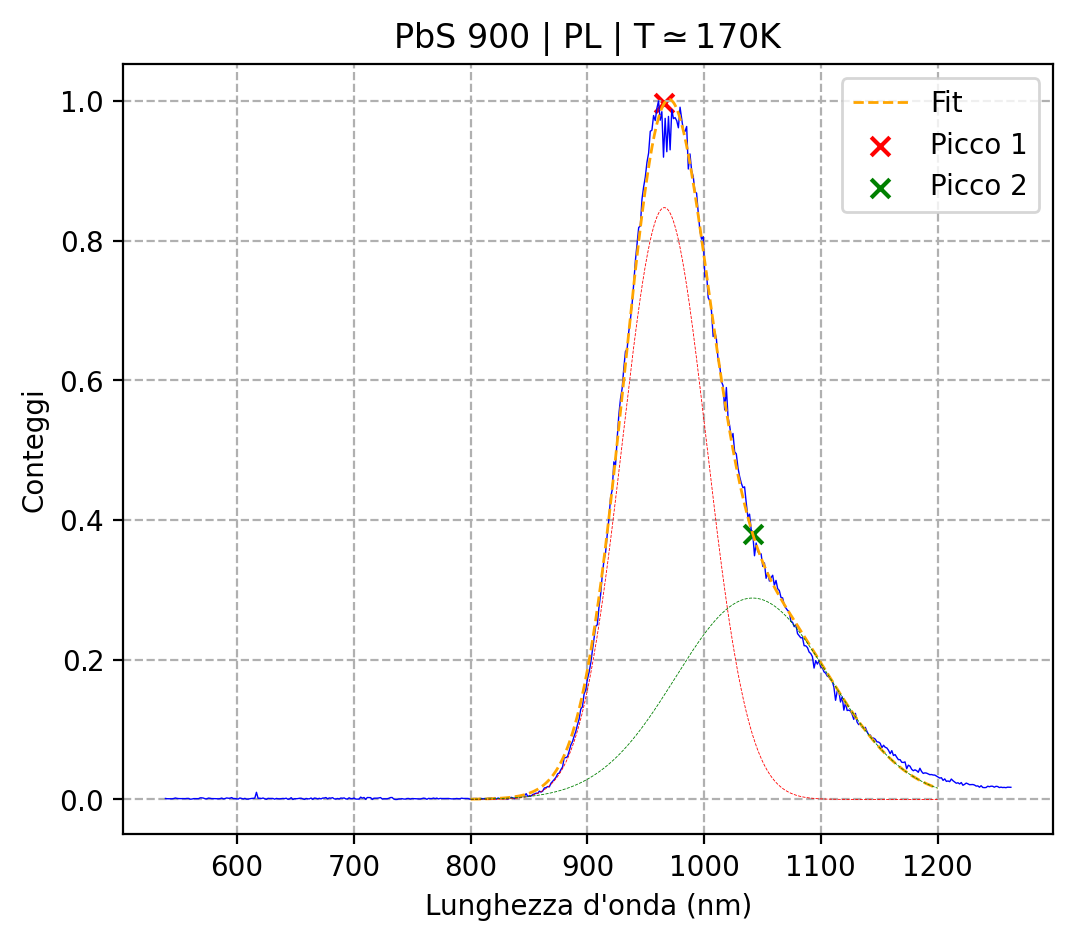

• Gaussiana  1
 - A = 0.847229634316691
 - mu = 965.9591723216085
 - sigma = 35.88427863843918
• Gaussiana  2
 - A = 0.28830067332334286
 - mu = 1041.514241778174
 - sigma = 65.99059054992314
 - chi2rid = 0.22649815564565084


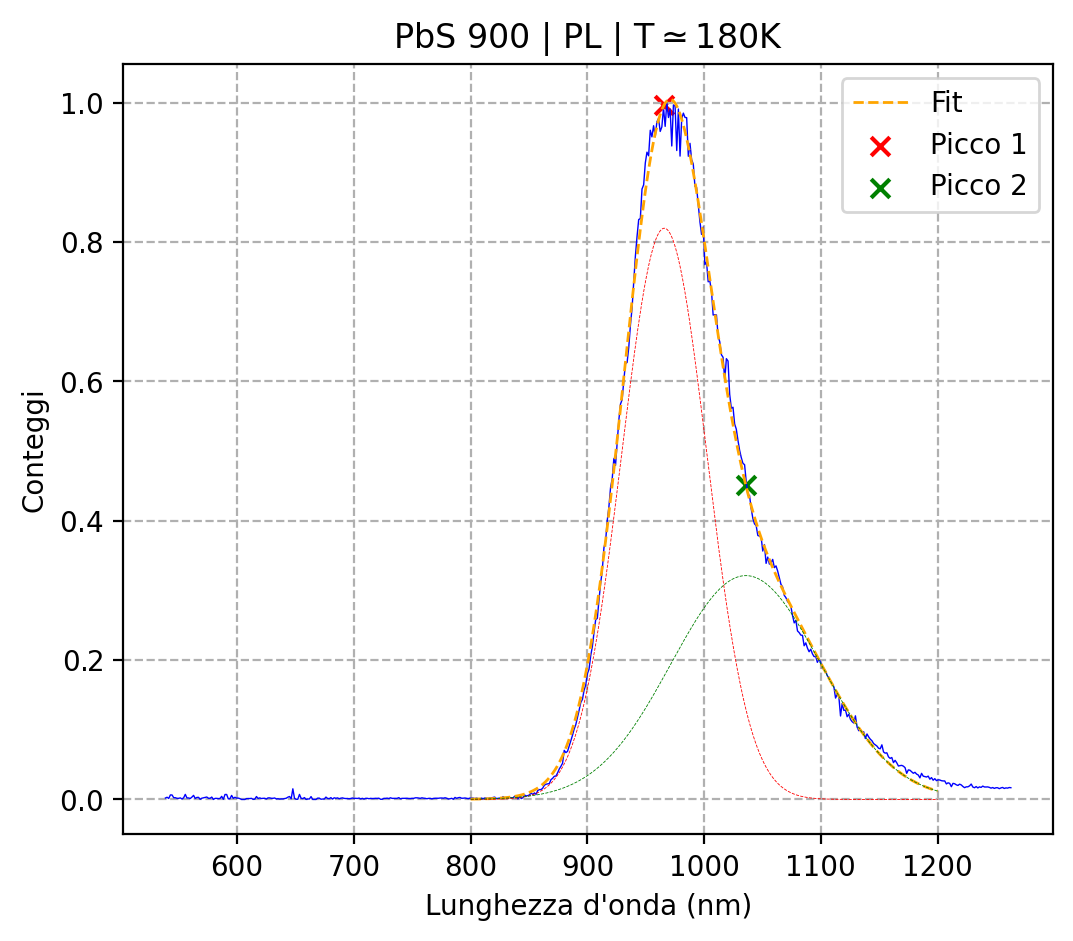

• Gaussiana  1
 - A = 0.8198016536892402
 - mu = 965.8627970040129
 - sigma = 36.379217055291505
• Gaussiana  2
 - A = 0.3212278559620461
 - mu = 1035.7344251099382
 - sigma = 64.12144104221785
 - chi2rid = 0.26283746094607446


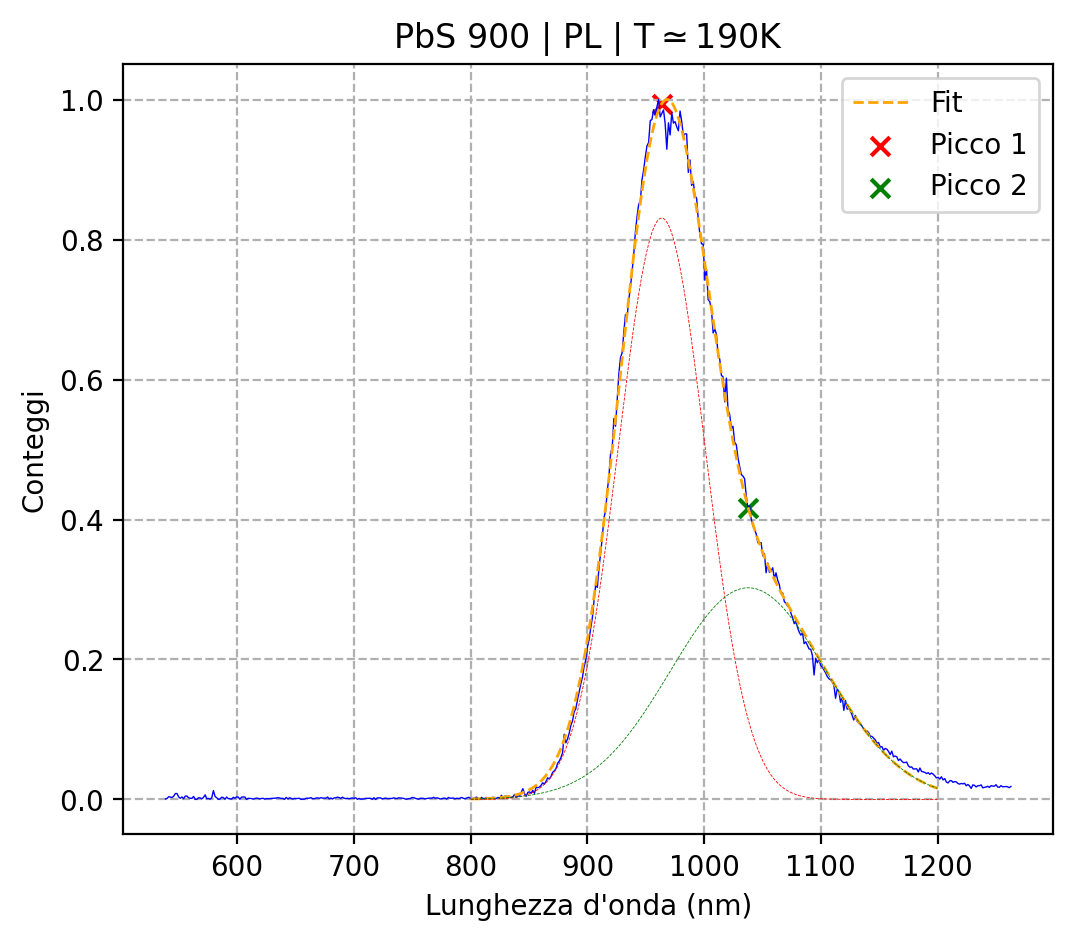

• Gaussiana  1
 - A = 0.830682380934691
 - mu = 963.6482871210036
 - sigma = 37.19754265264051
• Gaussiana  2
 - A = 0.30246007350379467
 - mu = 1037.7905329179548
 - sigma = 66.78418414826415
 - chi2rid = 0.2239564124281047


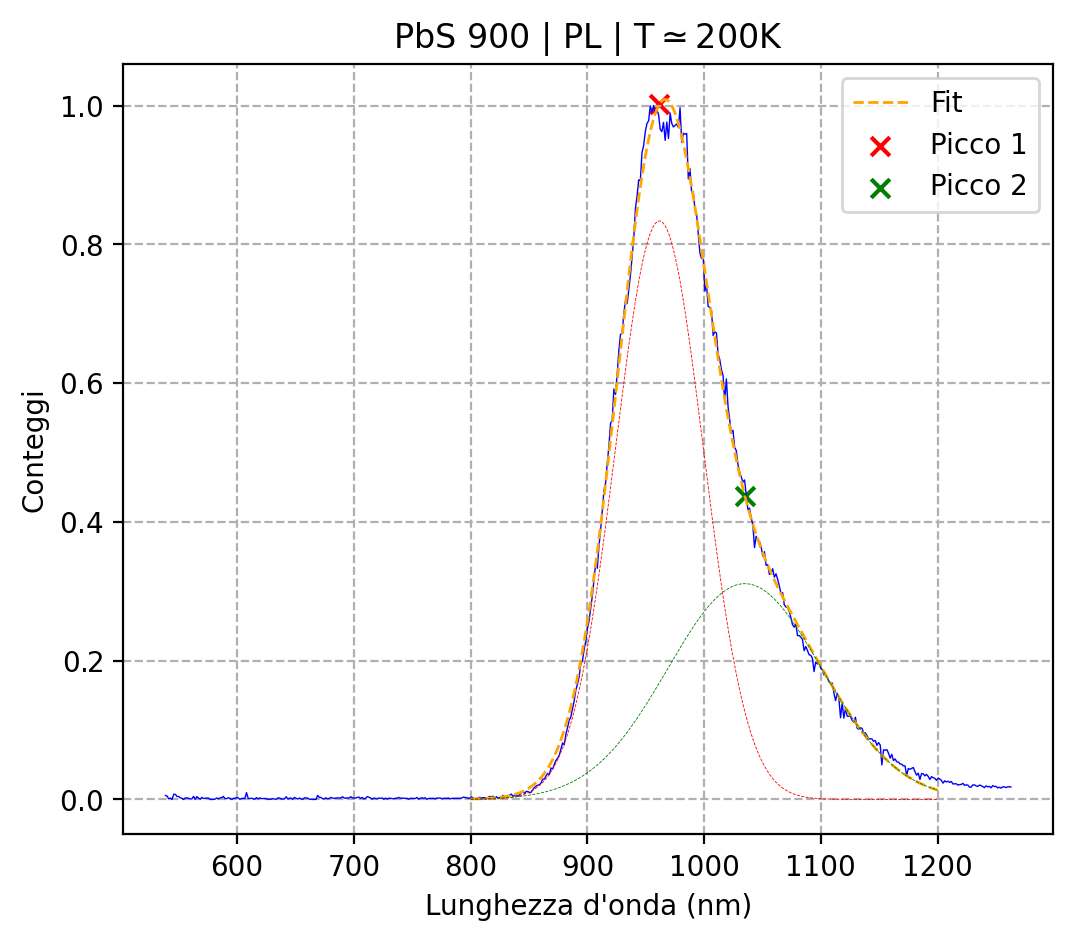

• Gaussiana  1
 - A = 0.8336867031240449
 - mu = 961.7011884915051
 - sigma = 37.67246728234511
• Gaussiana  2
 - A = 0.3109755718506199
 - mu = 1034.8070029096634
 - sigma = 65.95124126586116
 - chi2rid = 0.23641021153889344


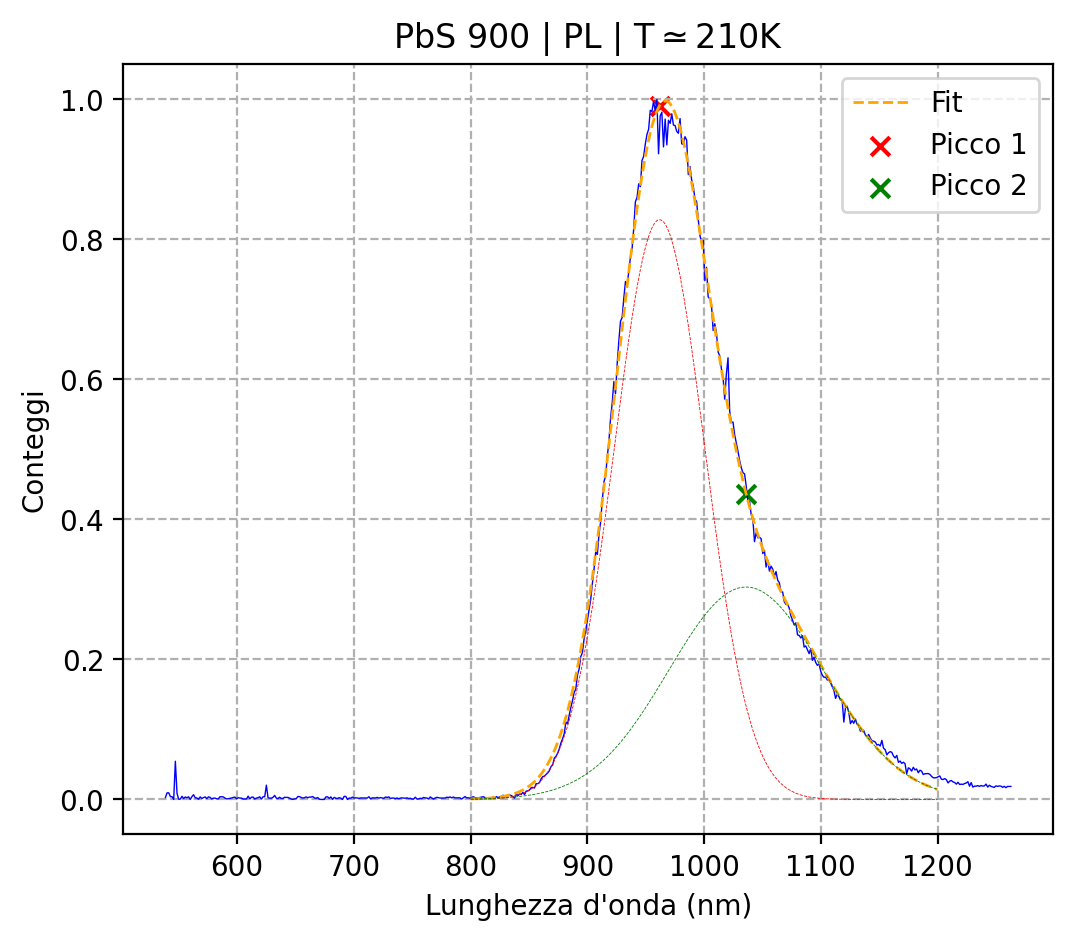

• Gaussiana  1
 - A = 0.828171944179892
 - mu = 961.8354841879446
 - sigma = 38.7806508608499
• Gaussiana  2
 - A = 0.30341169925944017
 - mu = 1035.9173656445314
 - sigma = 66.40403713243188
 - chi2rid = 0.27356023370620386


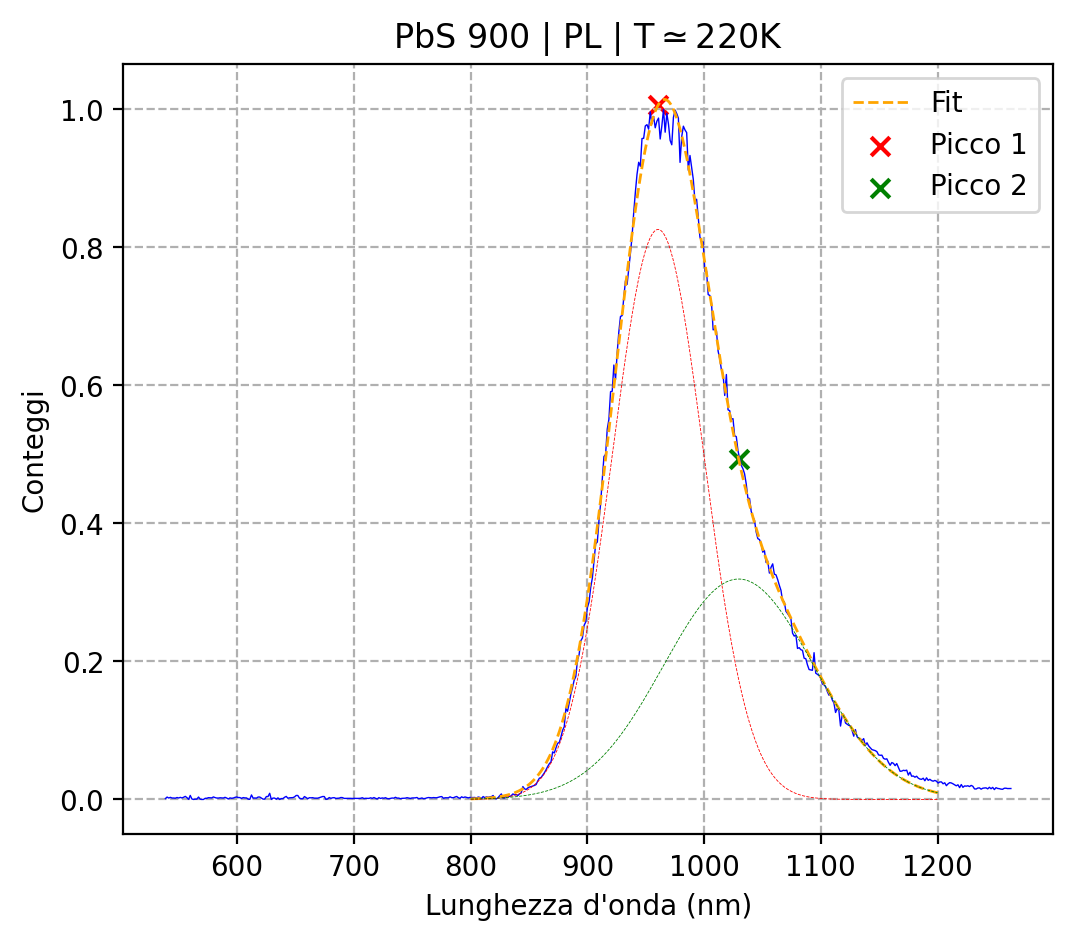

• Gaussiana  1
 - A = 0.826107693082132
 - mu = 960.5416690498631
 - sigma = 39.10655864306273
• Gaussiana  2
 - A = 0.31944011387554816
 - mu = 1029.538849502435
 - sigma = 64.43167851795127
 - chi2rid = 0.2738520822990303


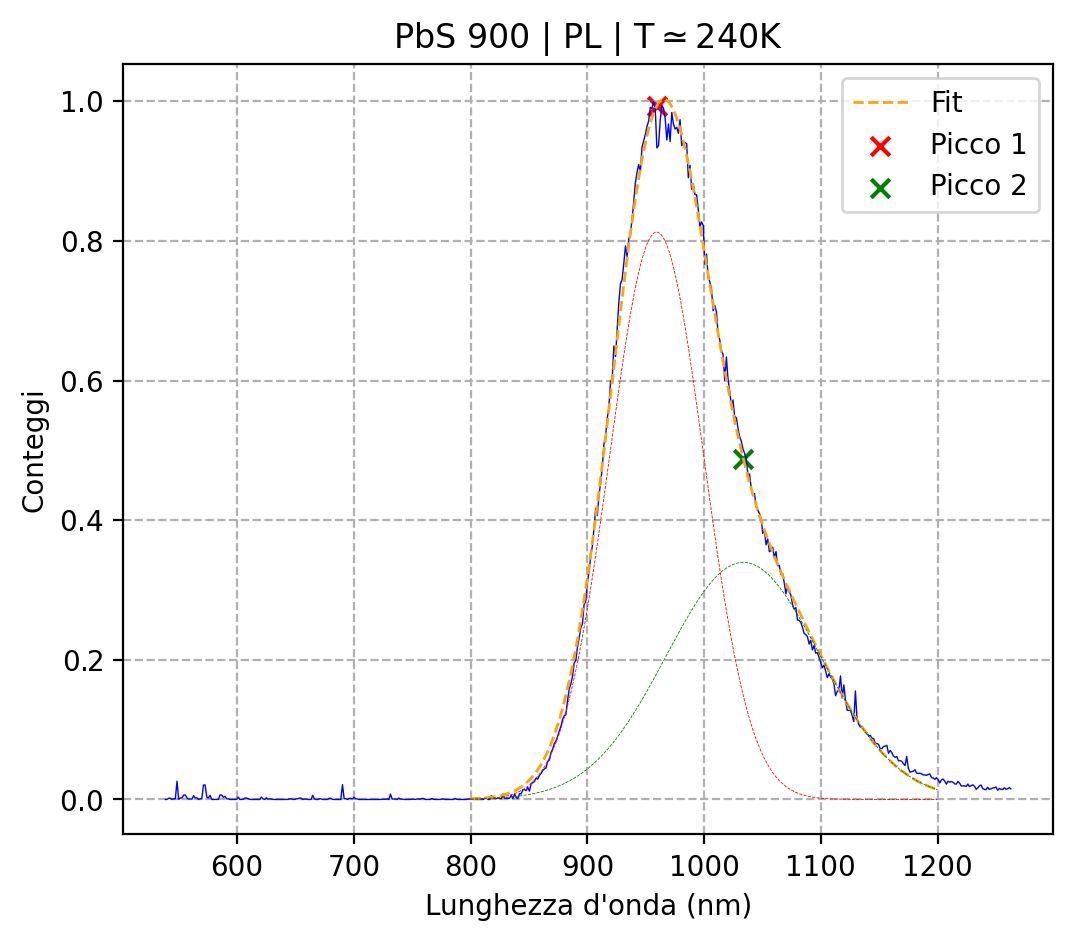

• Gaussiana  1
 - A = 0.8125320806681021
 - mu = 959.3693222589935
 - sigma = 40.244982108074964
• Gaussiana  2
 - A = 0.339503740883521
 - mu = 1033.5508896358704
 - sigma = 65.97071813754492
 - chi2rid = 0.6288683286826928


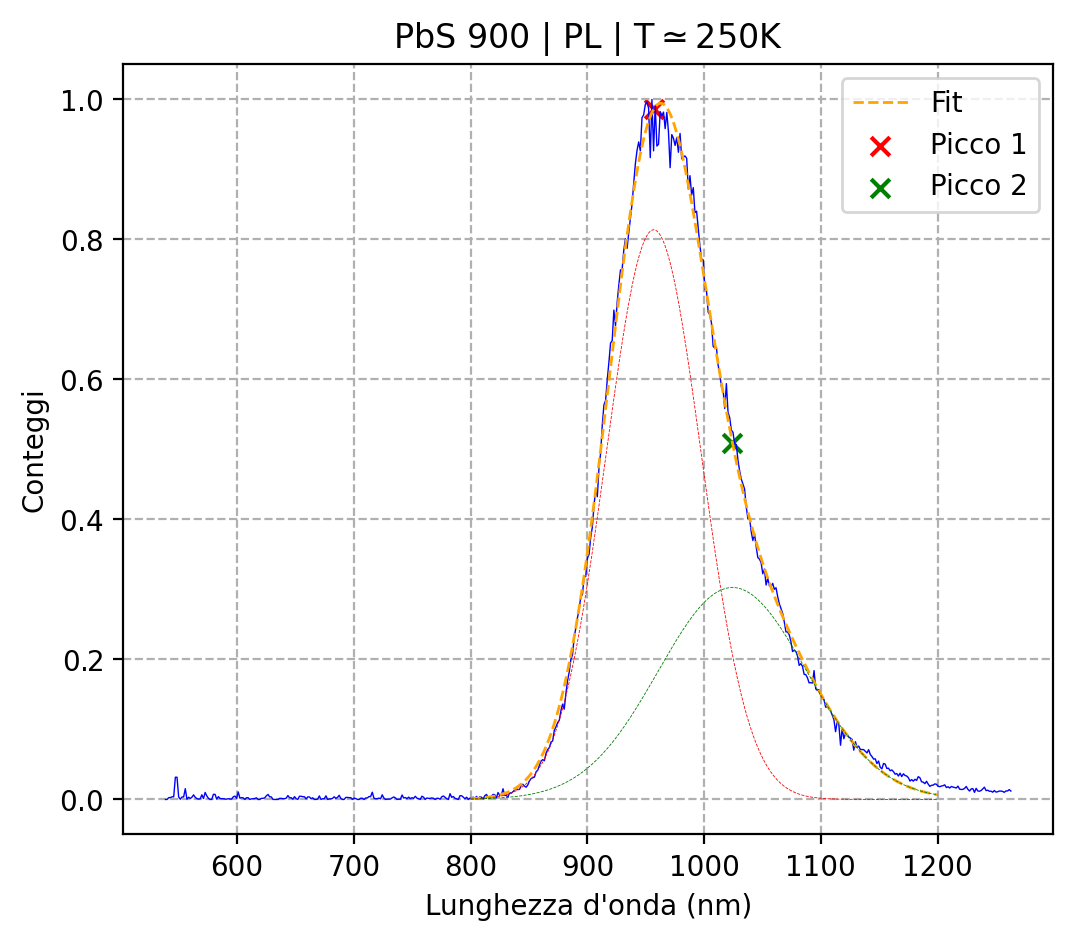

• Gaussiana  1
 - A = 0.8138171412726082
 - mu = 956.8106145276349
 - sigma = 40.737540138953406
• Gaussiana  2
 - A = 0.30277459211544067
 - mu = 1024.2625220335156
 - sigma = 63.49771735111235
 - chi2rid = 0.31806650554552185


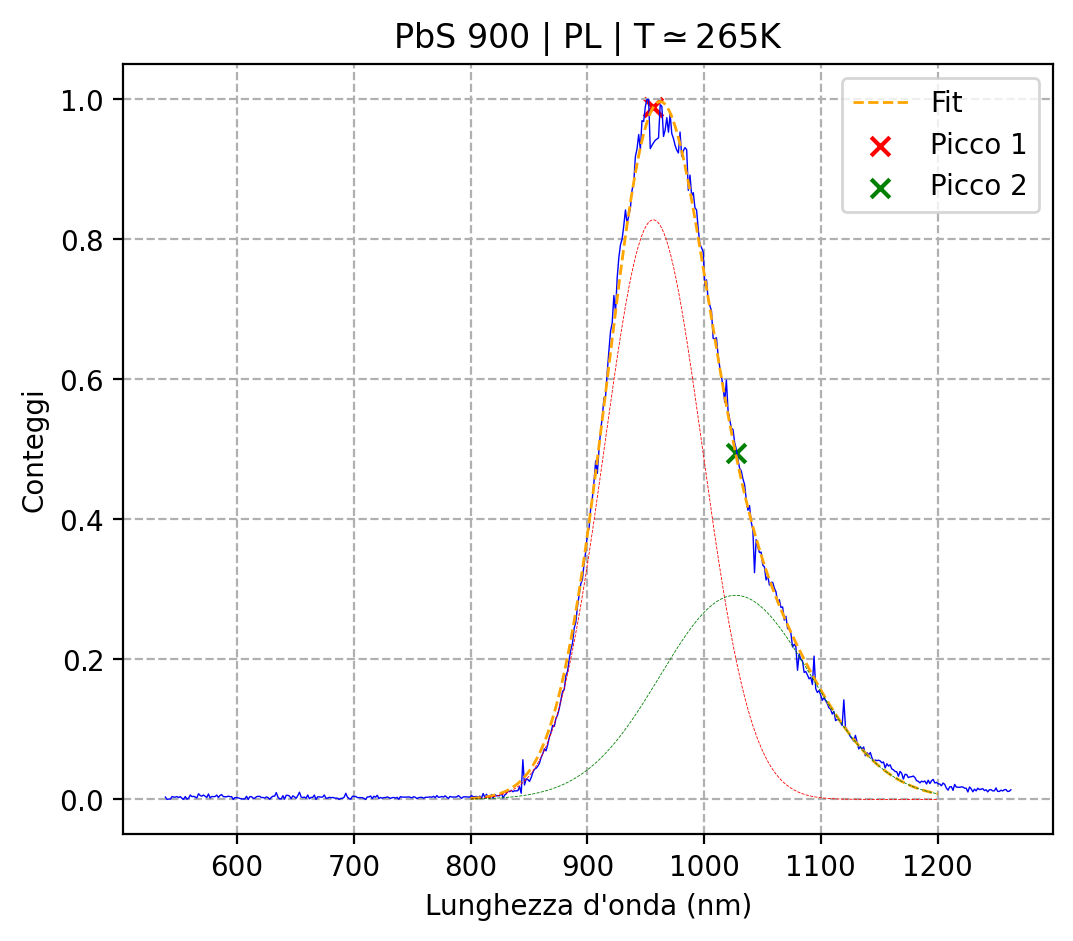

• Gaussiana  1
 - A = 0.8280543504081449
 - mu = 956.479569154715
 - sigma = 42.01532771620883
• Gaussiana  2
 - A = 0.2916216175678097
 - mu = 1026.916937229265
 - sigma = 64.58665492555437
 - chi2rid = 0.3659210544342125


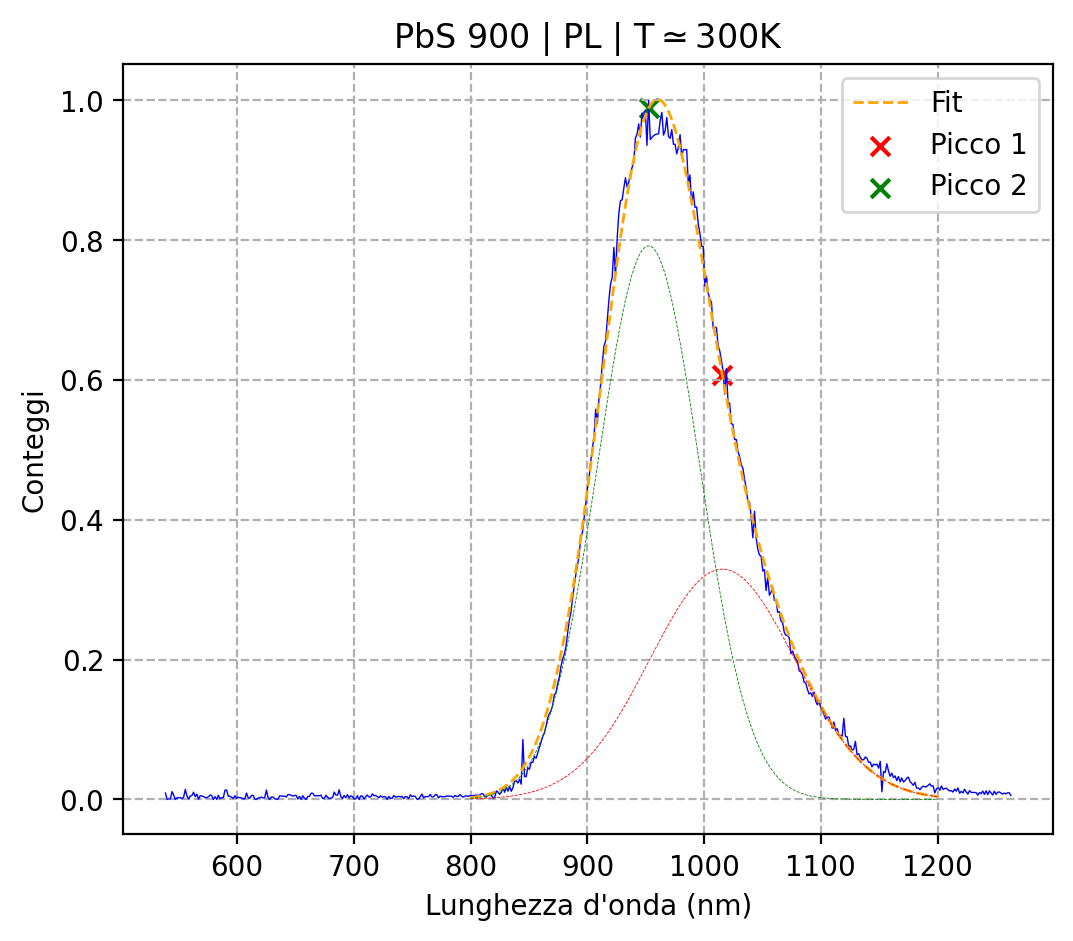

• Gaussiana  1
 - A = 0.3294311888385763
 - mu = 1015.5768735174844
 - sigma = 62.32209165105136
• Gaussiana  2
 - A = 0.7919841403490283
 - mu = 952.4374509719144
 - sigma = 43.59617914975911
 - chi2rid = 0.4926703735922057


In [ ]:
for T in arr_T:
    
    waveln = PbS_T[T][0]
    counts = PbS_T[T][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## FIT ##
    
    # isolo regione 800 < x < 1200
    mask = (waveln > 800) & (waveln < 1200)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 950, 50)
    ]
    
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds per i parametri
    low = [0.01, 800, 10] * len(params)  # Limiti inferiori 
    upp = [1, 1200, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=3, n_acq=5)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(800, 1200, 400)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1)#, zorder=2)
    
    # plotto anche i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label='Picco '+str(i+1),
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | PL | T$\simeq$' + T + r'K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)
    
    # estraggo da popt i parametri da usare per la prossima gaussiana
    valori = [] # inizializzo
    for i in range(0, round(len(popt)/3)):
        valori.append((popt[3*i], popt[3*i+1], popt[3*i+2]))
        
        
    # Raccolgo i picchi in PbS_T_peaks
    PbS_T_peaks[T] = [] # list di triple (A, mu, sigma)
    for i in range(round(len(popt)/3)):
        PbS_T_peaks[T].append([popt[3*i+0], popt[3*i+1], popt[3*i+2]])
    

---

I dati sui picchi raccolti in PbS_T_peaks vengono analizzati in PbS900_VARSHNI.ipynb

In [20]:
PbS_T_peaks

{'90': [[np.float64(0.8962841637403094),
   np.float64(969.7741282412981),
   np.float64(31.973414593135494)],
  [np.float64(0.208885352119124),
   np.float64(1049.5859331310648),
   np.float64(65.05518361659702)]],
 '100': [[np.float64(0.8960343121787757),
   np.float64(969.7092310539604),
   np.float64(31.648173529533935)],
  [np.float64(0.22331607202447468),
   np.float64(1048.7886026593944),
   np.float64(66.27952464200285)]],
 '110': [[np.float64(0.892841305006805),
   np.float64(968.8181995593548),
   np.float64(32.09382480521883)],
  [np.float64(0.2217664043989024),
   np.float64(1045.1483007622667),
   np.float64(65.5089999115695)]],
 '120': [[np.float64(0.8974476387651475),
   np.float64(968.1444229651712),
   np.float64(32.820905993682146)],
  [np.float64(0.22933938050960695),
   np.float64(1043.9325051428862),
   np.float64(64.6396816007328)]],
 '130': [[np.float64(0.8768993589406048),
   np.float64(968.8599113182962),
   np.float64(33.13292077926575)],
  [np.float64(0.25692

---